<a href="https://colab.research.google.com/github/2023garvitshrivastava-sketch/ML_lab/blob/main/PCA_vs_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

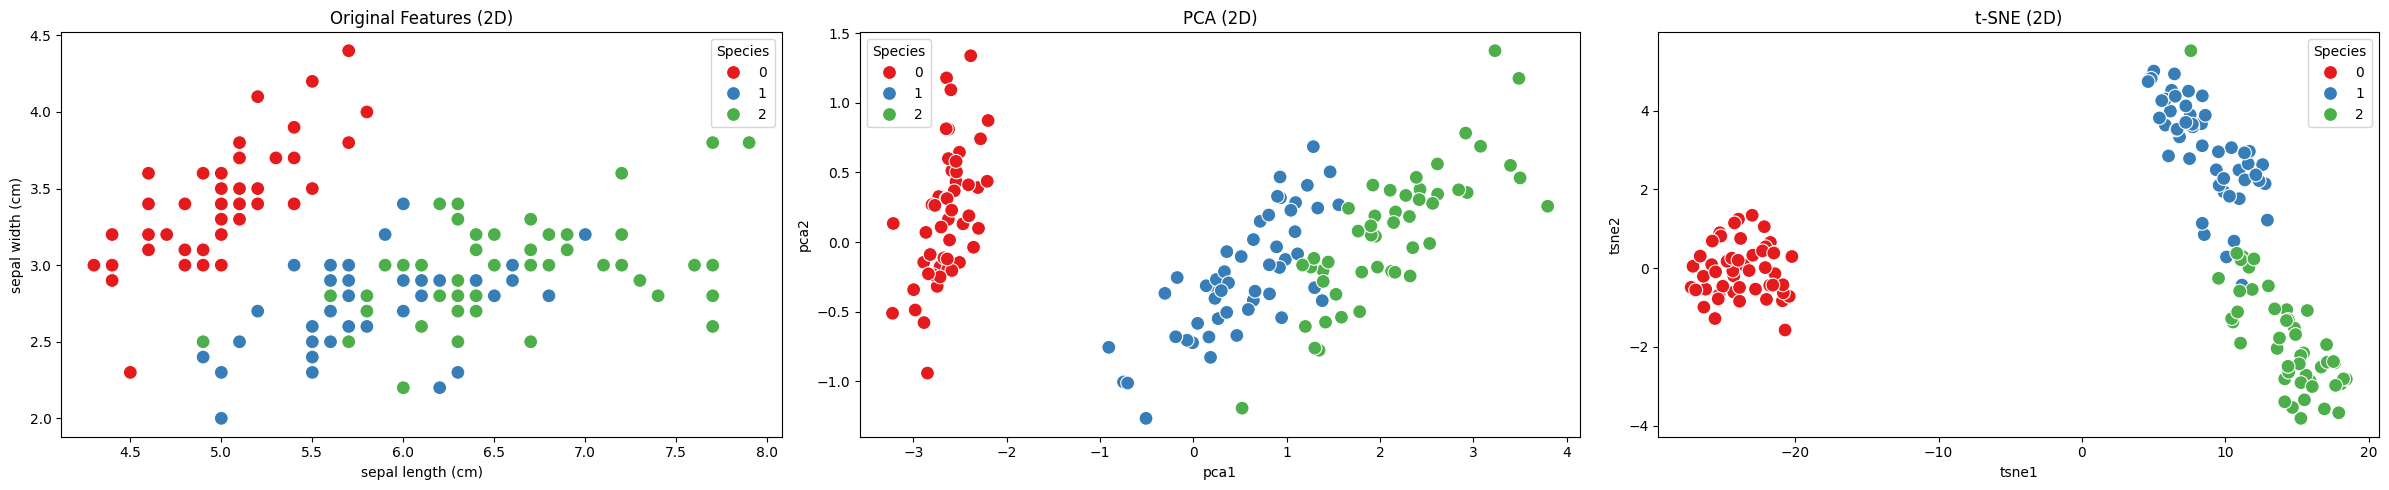

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Convert to DataFrame for easy plotting
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y
# PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Add embeddings to dataframe for plotting
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]
df['tsne1'] = X_tsne[:, 0]
df['tsne2'] = X_tsne[:, 1]

# -------------------------
# Plotting
# -------------------------
fig, axes = plt.subplots(1, 3, figsize=(24, 5))

# 1. Original scatter (first two features)
sns.scatterplot(ax=axes[0], x=iris.feature_names[0], y=iris.feature_names[1],
                hue='species', palette='Set1', data=df, s=100)
axes[0].set_title('Original Features (2D)')
axes[0].legend(title='Species', loc='best')



# 3. PCA scatter
sns.scatterplot(ax=axes[1], x='pca1', y='pca2', hue='species', palette='Set1', data=df, s=100)
axes[1].set_title('PCA (2D)')
axes[1].legend(title='Species', loc='best')

# 4. t-SNE scatter
sns.scatterplot(ax=axes[2], x='tsne1', y='tsne2', hue='species', palette='Set1', data=df, s=100)
axes[2].set_title('t-SNE (2D)')
axes[2].legend(title='Species', loc='best')

plt.tight_layout()
plt.show()
